# Pymaceuticals Inc.
---

### Analysis

- Based on this analysis, there appears to be a high positive correlation between the weight of each mouse and the average tumor volume. Also, of the top four regimens analyzed (Capomlin, Ramicane, Infubinol, and Ceftamin), Capomulin and Ramicene appear to be the most effective based on the average tumor volume in the analysis.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single DataFrame
combined_study_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Displaying the data table for preview
combined_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice = combined_study_data["Mouse ID"].unique()
number_of_mice = len(unique_mice)
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_study_data.loc[combined_study_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Getting all the data for the duplicate mouse ID. 
duplicate_mouse = combined_study_data.loc[combined_study_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = combined_study_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_study_data = clean_study_data.loc[(clean_study_data["Mouse ID"] != "g989"), :]
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_unique_mice = clean_study_data["Mouse ID"].value_counts()
cleaned_number_of_mice = len(cleaned_unique_mice)
cleaned_number_of_mice

248

# Summary Statistics

In [7]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_study_data["Tumor Volume (mm3)"].groupby(clean_study_data["Drug Regimen"]).mean()
median = clean_study_data["Tumor Volume (mm3)"].groupby(clean_study_data["Drug Regimen"]).median()
variance = clean_study_data["Tumor Volume (mm3)"].groupby(clean_study_data["Drug Regimen"]).var()
standard_deviation = clean_study_data["Tumor Volume (mm3)"].groupby(clean_study_data["Drug Regimen"]).std()
sem = clean_study_data["Tumor Volume (mm3)"].groupby(clean_study_data["Drug Regimen"]).sem()

# Assembling the resulting series into a single summary DataFrame.
results_summary = pd.DataFrame({"Mean Tumor Volume": mean, 
                                "Median Tumor Volume": median, 
                                "Tumor Volume Variance": variance, 
                                "Tumor Volume Std. Dev.": standard_deviation, 
                                "Tumor Volume Std. Err.": sem})
results_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggregated_summary = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(mean = "mean", median = "median", var = lambda x: x.var(), std = lambda x: x.std(), sem = lambda x: x.sem())

# Displaying the summary
aggregated_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

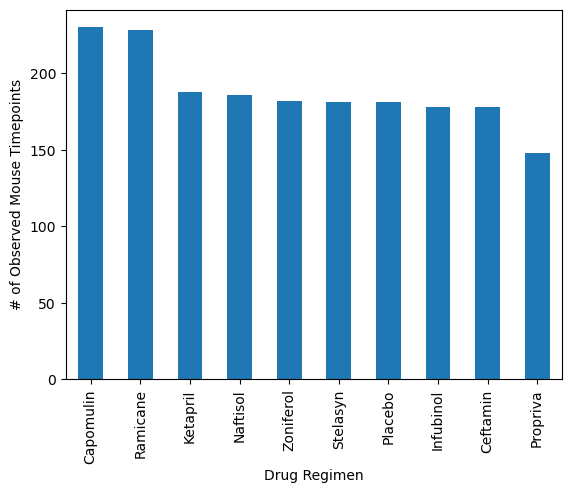

In [9]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_bar_plot = clean_study_data["Drug Regimen"].value_counts().plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
drug_regimen_bar_plot

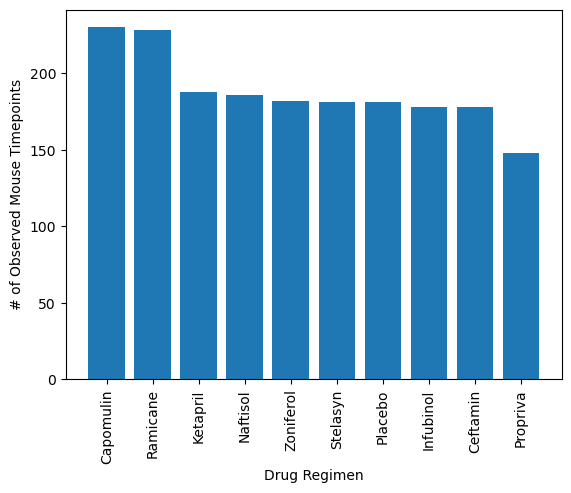

In [10]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
unique_drug_regimens = clean_study_data["Drug Regimen"].value_counts().to_dict()
x_axis = unique_drug_regimens.keys()
plt.xticks(rotation="vertical")
y_axis = clean_study_data["Drug Regimen"].value_counts()

# Setting labels and displaying plot
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis, y_axis, align="center")
plt.show()

<Axes: ylabel='Sex'>

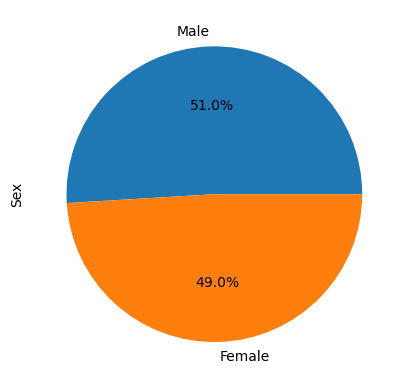

In [11]:
# Generating a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_pie_plot = clean_study_data["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", ylabel="Sex")
mouse_sex_pie_plot

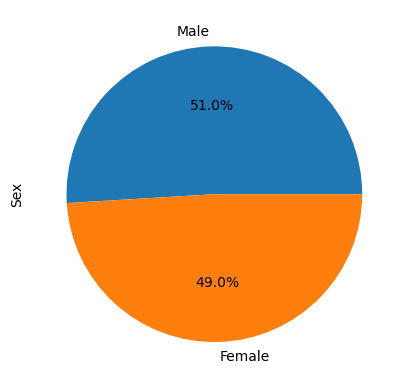

In [12]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = clean_study_data["Sex"].value_counts().to_dict()
distribution = mouse_sex.values()
labels = mouse_sex.keys()

# Setting labels and displaying plot
plt.ylabel("Sex")
plt.pie(distribution, labels = labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_df = combined_study_data[combined_study_data["Drug Regimen"].isin(treatment_regimens)]

# Starting by getting the last (greatest) timepoint for each mouse
greatest_timepoint = regimen_df.groupby("Mouse ID")["Mouse ID"].unique()
greatest_timepoint = regimen_df.groupby("Mouse ID")["Timepoint"].max()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_tumor_merge = pd.merge(greatest_timepoint, combined_study_data, how="left", on=["Mouse ID", "Timepoint"])
timepoint_tumor_merge


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Putting treatments into a list for for loop (and later for plot labels)
regimen_group = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating empty list to fill with tumor vol data (for plotting)
tumor_volume = {}

for regimen in regimen_group:
    regimen_tumor_volumes = timepoint_tumor_merge.loc[timepoint_tumor_merge["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    tumor_volume[regimen] = regimen_tumor_volumes

# Calculating the IQR and quantitatively determine if there are any potential outliers. 
    # Locating the rows which contain mice on each drug and get the tumor volumes
    # adding subset 
    # Determining outliers using upper and lower bounds
for regimen in tumor_volume:
    quartiles = tumor_volume[regimen].quantile([.25, .5, .75]).round(2)
    lower_quartile = quartiles[.25].round(2)
    upper_quartile = quartiles[.75].round(2)
    iqr = round(upper_quartile - lower_quartile, 2)
    lower_bound = round(lower_quartile - (1.5 * iqr), 2)
    upper_bound = round(upper_quartile + (1.5 * iqr), 2)

    print("------------------------------------------")
    print(f"The lower quartile of {regimen} is: {lower_quartile}.")
    print(f"The upper quartile of {regimen} is: {upper_quartile}.")
    print(f"The interquartile range of {regimen} is: {iqr}.")
    print(f"Values below {lower_bound} for {regimen} could be outliers.")
    print(f"Values above {upper_bound} for {regimen} could be outliers.")
    print("------------------------------------------")

------------------------------------------
The lower quartile of Capomulin is: 32.38.
The upper quartile of Capomulin is: 40.16.
The interquartile range of Capomulin is: 7.78.
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
------------------------------------------
------------------------------------------
The lower quartile of Ramicane is: 31.56.
The upper quartile of Ramicane is: 40.66.
The interquartile range of Ramicane is: 9.1.
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
------------------------------------------
------------------------------------------
The lower quartile of Infubinol is: 54.05.
The upper quartile of Infubinol is: 65.53.
The interquartile range of Infubinol is: 11.48.
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for Infubinol could be outliers.
------------------------------------------
------------------------------------

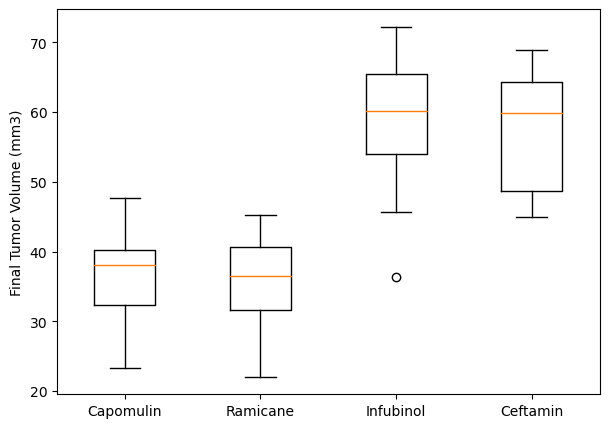

In [15]:
# Generating a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volumes_by_regimen = {}

# Looping through each regimen and store the tumor volumes in the dictionary
for regimen in treatment_regimens:
    regimen_tumor_volumes = timepoint_tumor_merge.loc[timepoint_tumor_merge["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    tumor_volumes_by_regimen[regimen] = regimen_tumor_volumes

# Creating a list to hold the tumor volumes for each regimen
data_to_plot = [tumor_volumes_by_regimen[regimen].tolist() for regimen in treatment_regimens]

# Creating the boxplot
plt.figure(figsize=(7, 5))
plt.boxplot(data_to_plot, labels=treatment_regimens)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

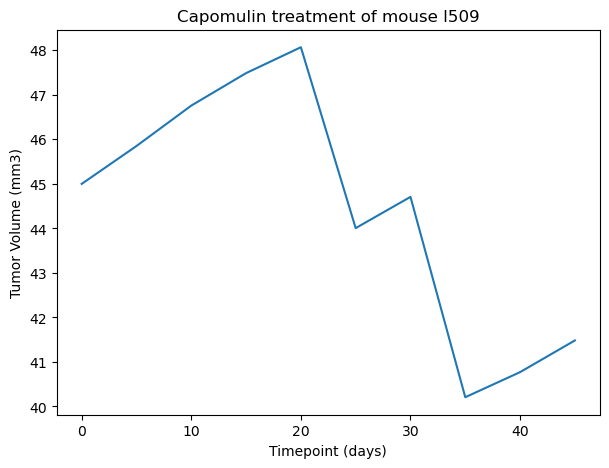

In [16]:
# Generating a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_capomulin_data = combined_study_data[(combined_study_data["Mouse ID"] == "l509") & (combined_study_data["Drug Regimen"] == "Capomulin")]

# Create the line plot
plt.figure(figsize=(7, 5))
plt.plot(mouse_l509_capomulin_data["Timepoint"], mouse_l509_capomulin_data["Tumor Volume (mm3)"], linestyle='-')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


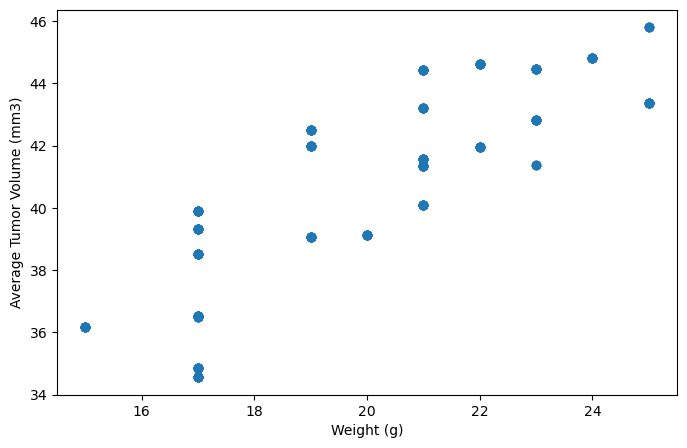

In [17]:
# Generating a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_study_data[combined_study_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume data with the original data to get the mouse weight
merged_data = pd.merge(capomulin_data, average_tumor_volume, on="Mouse ID")
merged_data = merged_data.rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume (mm3)"})

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(merged_data["Weight (g)"], merged_data["Average Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


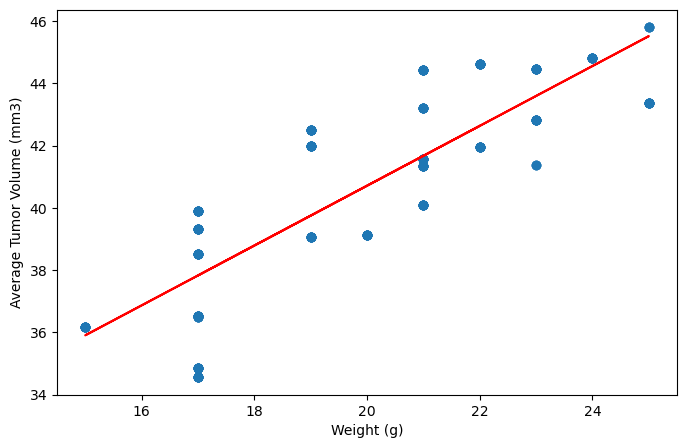

In [19]:
# Calculating the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_study_data[combined_study_data["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

merged_data = pd.merge(capomulin_data, average_tumor_volume, on="Mouse ID")
merged_data = merged_data.rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume (mm3)"})

correlation_coefficient, _ = pearsonr(merged_data["Weight (g)"], merged_data["Average Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

X = merged_data[["Weight (g)"]]
y = merged_data["Average Tumor Volume (mm3)"]

regression_model = LinearRegression()
regression_model.fit(X, y)

slope = regression_model.coef_[0]
intercept = regression_model.intercept_

# Plot the scatter plot and the linear regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y)
plt.plot(X, regression_model.predict(X), color='red', label=f"y = {slope:.2f} * x + {intercept:.2f}")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
